In [1]:
import os
import time
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sdcdup.utils import get_project_root
from sdcdup.utils import ij_pairs_3x3
from sdcdup.utils import get_tile
from sdcdup.visualization import get_ticks

%load_ext dotenv
%dotenv

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
BIGGEST_SIZE = 20
plt.rc('font', size=BIGGEST_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=BIGGEST_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

project_root = get_project_root()
train_image_dir = os.path.join(project_root, os.getenv('RAW_DATA_DIR'), 'train_768')

In [2]:
ticks768 = get_ticks()

In [3]:
hist_size = 256
ticks256 = get_ticks(256, 64, hist_size)

In [4]:
# high pixel difference but still duplicate (high entropy)
img1_id = "03a5fd8d2.jpg"
img2_id = "676f4cfd0.jpg"

img1_id = "50fcf9188.jpg"
img2_id = "8ff2e334e.jpg"

# moderate pixel difference but still duplicate (medium entropy)
img1_id = "00021ddc3.jpg"
img2_id = "7ca331f03.jpg"

# highly different non-duplicates with lots of clouds. (low entropy)
# img1_id = "1636d25de.jpg"
# img2_id = "7947a9a56.jpg"

# images with flat colors. (low entropy)
# img1_id = "de018b2a8.jpg"  # mostly black
# img1_id = "115ca0d9c.jpg"  # mostly water
# img2_id = "82dda1e74.jpg"  # mostly water
# img1_id = "08d62ac27.jpg"  # dark clouds
# img1_id = "0318fc519.jpg"  # mostly clouds
# img2_id = "09d077568.jpg"  # mostly clouds
# img2_id = "447b5ff7c.jpg"  # mostly clouds
img1_rgb = cv2.cvtColor(cv2.imread(os.path.join(train_image_dir, img1_id)), cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(cv2.imread(os.path.join(train_image_dir, img2_id)), cv2.COLOR_BGR2RGB)

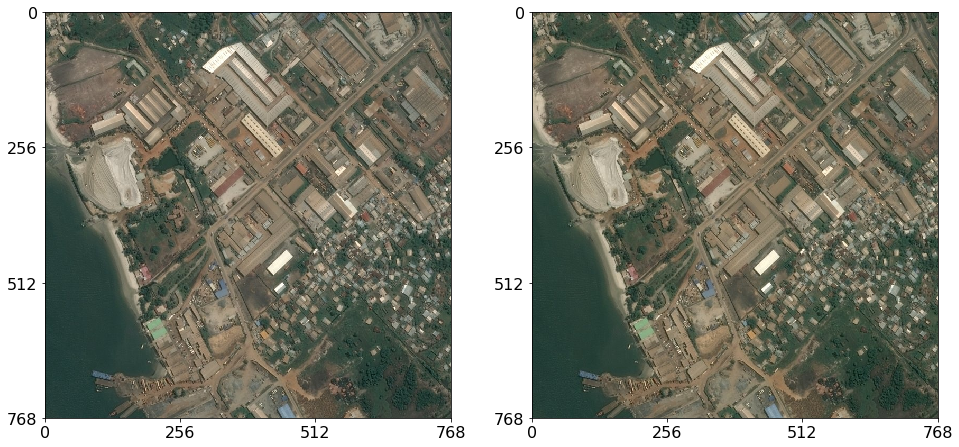

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
ax1.imshow(img1_rgb, interpolation = 'nearest')
ax1.set_xticks(ticks768)
ax1.set_yticks(ticks768)
ax2.imshow(img2_rgb, interpolation = 'nearest')
ax2.set_xticks(ticks768)
ax2.set_yticks(ticks768)
plt.show()

In [6]:
hist1r = cv2.calcHist([img1_rgb], [0], None, [hist_size], [0, 256])
hist1g = cv2.calcHist([img1_rgb], [1], None, [hist_size], [0, 256])
hist1b = cv2.calcHist([img1_rgb], [2], None, [hist_size], [0, 256])
hist2r = cv2.calcHist([img2_rgb], [0], None, [hist_size], [0, 256])
hist2g = cv2.calcHist([img2_rgb], [1], None, [hist_size], [0, 256])
hist2b = cv2.calcHist([img2_rgb], [2], None, [hist_size], [0, 256])
hist12r = cv2.calcHist([img1_rgb[0], img2_rgb[0]], [0, 1], None, [hist_size] * 2, [0, 256, 0, 256])
hist12g = cv2.calcHist([img1_rgb[1], img2_rgb[1]], [0, 1], None, [hist_size] * 2, [0, 256, 0, 256])
hist12b = cv2.calcHist([img1_rgb[2], img2_rgb[2]], [0, 1], None, [hist_size] * 2, [0, 256, 0, 256])
hist1rgb = cv2.calcHist([img1_rgb], [0, 1, 2], None, [hist_size] * 3, [0, 256, 0, 256, 0, 256])
hist2rgb = cv2.calcHist([img2_rgb], [0, 1, 2], None, [hist_size] * 3, [0, 256, 0, 256, 0, 256])

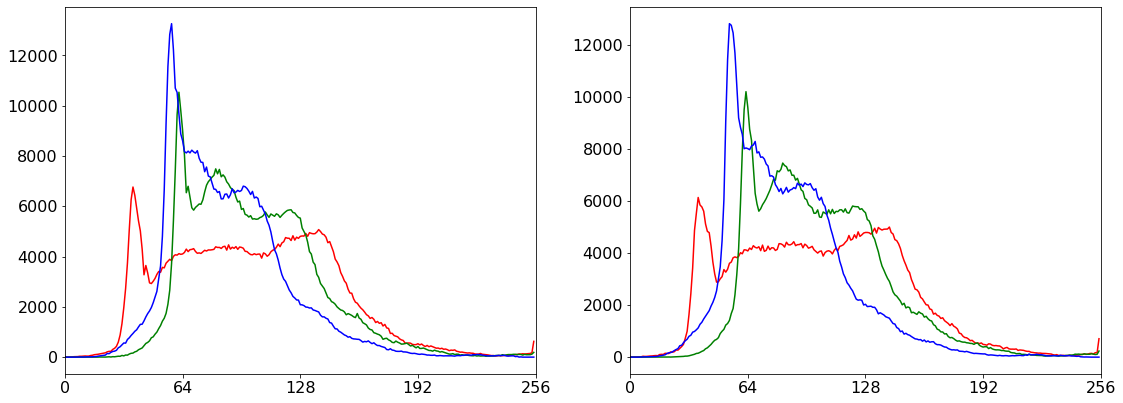

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))
color = ('r','g','b')
for i, col in enumerate(color):
    hist1 = cv2.calcHist([img1_rgb], [i], None, [hist_size], [0, 256])
    hist2 = cv2.calcHist([img2_rgb], [i], None, [hist_size], [0, 256])
    ax1.plot(hist1, color = col)
    ax2.plot(hist2, color = col)
ax1.set_xlim([0, hist_size])
ax1.set_xticks(ticks256)
ax2.set_xlim([0, hist_size])
ax2.set_xticks(ticks256)
plt.tight_layout()

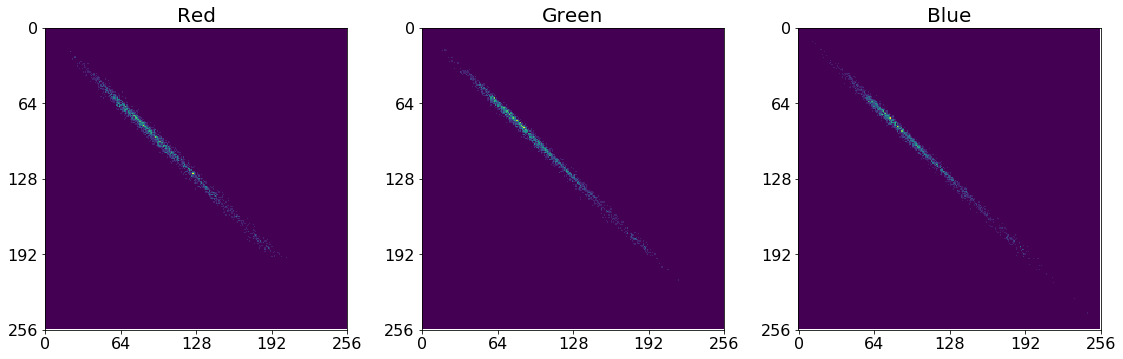

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 6))
ax1.imshow(hist12r, interpolation = 'nearest')
ax1.set_title('Red')
ax1.set_xticks(ticks256)
ax1.set_yticks(ticks256)
ax2.imshow(hist12g, interpolation = 'nearest')
ax2.set_title('Green')
ax2.set_xticks(ticks256)
ax2.set_yticks(ticks256)
ax3.imshow(hist12b, interpolation = 'nearest')
ax3.set_title('Blue')
ax3.set_xticks(ticks256)
ax3.set_yticks(ticks256)
plt.tight_layout()
plt.show()

In [ ]:
print(cv2.compareHist(hist1rgb, hist2rgb, cv2.HISTCMP_HELLINGER))
print(cv2.compareHist(hist1r, hist2r, cv2.HISTCMP_HELLINGER))
print(cv2.compareHist(hist1g, hist2g, cv2.HISTCMP_HELLINGER))
print(cv2.compareHist(hist1b, hist2b, cv2.HISTCMP_HELLINGER))

print(cv2.compareHist(hist1rgb, hist2rgb, cv2.HISTCMP_CHISQR_ALT))
print(cv2.compareHist(hist1r, hist2r, cv2.HISTCMP_CHISQR_ALT))
print(cv2.compareHist(hist1g, hist2g, cv2.HISTCMP_CHISQR_ALT))
print(cv2.compareHist(hist1b, hist2b, cv2.HISTCMP_CHISQR_ALT))

print(cv2.compareHist(hist1rgb, hist2rgb, cv2.HISTCMP_INTERSECT))
print(cv2.compareHist(hist1r, hist2r, cv2.HISTCMP_INTERSECT))
print(cv2.compareHist(hist1g, hist2g, cv2.HISTCMP_INTERSECT))
print(cv2.compareHist(hist1b, hist2b, cv2.HISTCMP_INTERSECT))

print(cv2.compareHist(hist1rgb, hist2rgb, cv2.HISTCMP_KL_DIV))
print(cv2.compareHist(hist1r, hist2r, cv2.HISTCMP_KL_DIV))
print(cv2.compareHist(hist1g, hist2g, cv2.HISTCMP_KL_DIV))
print(cv2.compareHist(hist1b, hist2b, cv2.HISTCMP_KL_DIV))

Exact Match

In [ ]:
'Hellinger',    'rgb', 'r', 'g', 'b'
    256                           0
'ChiSqr_alt',   'rgb', 'r', 'g', 'b'
    256                           0
'Intersect',    'rgb', 'r', 'g', 'b'
    256                      589824 --> 256*256*3*3
'KL_Div',       'rgb', 'r', 'g', 'b'
    256                           0

Exact Missmatch

In [ ]:
'Hellinger',    'rgb', 'r', 'g', 'b'
    256                           1
'ChiSqr_alt',   'rgb', 'r', 'g', 'b'
    256                     2359296 --> 256*256*3*3*2*2
'Intersect',    'rgb', 'r', 'g', 'b'
    256                           0
'KL_Div',       'rgb', 'r', 'g', 'b'
    256          21418532.770029385 --> ???

In [ ]:
"03a5fd8d2.jpg" vs "676f4cfd0.jpg"

'Hellinger',   'rgb', 'r', 'g', 'b'
    256,       0.5101613176176912,0.13311772635687172,0.17901047380929752,0.1675464940024875
    128,       0.496118478247966, 0.1328757521815579, 0.17886339942387053,0.1673809583574397
     64,       0.4316713614412065,0.1326923693480445, 0.17862500491883446,0.16718985751407883
     32,       0.3465050714913721,0.13226786554292289,0.17806635571851823,0.16660166447688993

'ChiSqr_alt',    'rgb', 'r', 'g', 'b'
    256,       947218.127977416, 80980.61402209185,144882.01838110096,127304.40196772343
    128,       915355.822142716, 80750.27150209267,144701.3907563206, 127110.84848661942
     64,       727124.4057309293,80559.29558113641,144355.41953295274,126864.91520774094
     32,       483158.1057538808,80113.5899539676, 143493.67896449205,126031.82119122455

'Intersect',    'rgb', 'r', 'g', 'b'
    256,       254122.0,500916.0,469717.0,477788.0
    128,       258566.0,501128.0,469786.0,477799.0
     64,       305869.0,501137.0,469800.0,477799.0
     32,       373006.0,501164.0,469800.0,479099.0

'KL_Div',       'rgb', 'r', 'g', 'b'
    256,       1104231.2446607982, 48923.80576869719,78815.28969744346,69333.3702006328
    128,        903331.8697237927, 47882.15005776592,78666.3938462355, 69146.64759504885
     64,        533667.1018799265, 46963.13961652001,78457.55716844826,68972.05737662611
     32,        317564.30749812844,43928.80490360679,77983.17613419474,68290.78437813898

In [ ]:
"00021ddc3.jpg" vs "7ca331f03.jpg"

'Hellinger',   'rgb', 'r', 'g', 'b'
    256,       0.5073876429262368 ,0.02064160967797357 ,0.0239282451779752  ,0.07565757251450936
    128,       0.4774321992699387 ,0.01815070456445946 ,0.021525125181221565,0.07409099404111166
     64,       0.37981383950876507,0.015759044259807408,0.019049105373379865,0.07035788800513225
     32,       0.2778190530437986 ,0.014990703026677703,0.016807251395283655,0.06974489693924078

'ChiSqr_alt',    'rgb', 'r', 'g', 'b'
    256,       861727.7257452664 ,2003.2367145685826,2676.2736751269604,26268.685090956318
    128,       789189.6116183588 ,1551.5414374503575,2165.86881792326  ,25236.221031785433
     64,       557812.8520237854 ,1170.8274658886253,1707.2332775968973,22938.897488312683
     32,       320221.74202075956,1059.7265558718525,1329.9638193569083,22559.05542394988

'Intersect',    'rgb', 'r', 'g', 'b'
    256,       280881.0,579617.0,577773.0,552543.0
    128,       296801.0,580878.0,579355.0,554046.0
     64,       346210.0,581268.0,579687.0,554105.0
     32,       415215.0,581817.0,580542.0,554132.0

'KL_Div',       'rgb', 'r', 'g', 'b'
    256,       1752814.129854564 ,988.4325633298325,1508.6592610661326,12431.87886426292
    128,       1279376.9040245938,769.9381631446793,1256.3751694428615,11930.413511908295
     64,       528268.6214762959 ,584.9992374177738,883.1931212537613 ,10854.905063728225
     32,       205737.1893425753 ,529.2396843566863,693.6483243763354 ,10673.181198485305

In [ ]:
"1636d25de.jpg" vs "7947a9a56.jpg"

'Hellinger',   'rgb', 'r', 'g', 'b'
    256,       0.1378165816428044 ,0.10865355622366842,0.1080404179815353 ,0.10517334313505028
    128,       0.1331967804180492 ,0.1084008825347025 ,0.10764756605738111,0.10398759729252657
     64,       0.11942078826503821,0.10739720519373333,0.10679544851857413,0.1028753605687354
     32,       0.11122728857882103,0.10491989549966503,0.10451278021347767,0.10113911334883546

'ChiSqr_alt',    'rgb', 'r', 'g', 'b'
    256,       52145.225347797335,32491.136811013264,32050.26684382397 ,29853.975987135065
    128,       49362.15314866481 ,32282.75107129625 ,31709.388134372657,28776.645989059278
     64,       39517.1722813654  ,31405.42274947245 ,30936.30174920531 ,27779.63235426242
     32,       33255.20543883372 ,29198.916838628556,28933.33577010051 ,26380.676085373714

'Intersect',    'rgb', 'r', 'g', 'b'
    256,       574125.0,578249.0,578267.0,578416.0
    128,       574567.0,578278.0,578280.0,578419.0
     64,       576491.0,578295.0,578313.0,578448.0
     32,       577401.0,578338.0,578323.0,578482.0

'KL_Div',       'rgb', 'r', 'g', 'b'
    256,       357252.85402197985,303947.39260760444,304598.969740345  ,295863.5882620861
    128,       350125.8445519493 ,309821.52080090746,311962.7318711431 ,301153.8622496766
     64,       331823.93907400814,313575.1361277952 ,318987.5342109353 ,307885.131338421
     32,       329073.53235940816,314052.26720955706,325126.15735132527,305134.5551587083

For near solid tiles, can we use histograms to inform us about dups?

In [ ]:
img_id = img2_id
img_rgb = img2_rgb

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (16, 16))
for idx, (i, j) in enumerate(ij_pairs_3x3):
    tile = get_tile(img_rgb, idx)
    ax[i][j].imshow(tile, interpolation = 'nearest')
    ax[i][j].set_xticks(ticks256)
    ax[i][j].set_yticks(ticks256)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (16, 8))
color = ('r','g','b')
for idx, (i, j) in enumerate(ij_pairs_3x3):
    tile = get_tile(img_rgb, idx)
    print(idx, end='|')
    for ci, col in enumerate(color):
        hist1 = cv2.calcHist([tile], [ci], None, [hist_size], [0, 256])
        ctmax = np.argmax(hist1)
        print(f"{col}={ctmax:>3},{int(hist1[ctmax][0]):>5}", end='|')
        ax[i][j].plot(hist1, color=col)
    print('')
    ax[i][j].set_xlim([0, hist_size])
    ax[i][j].set_xticks(ticks256)
    ax[i][j].set_ylim([0, 70000])

# plt.show()
plt.tight_layout()

In [ ]:
def get_subhist3d(k, hist_rgb, r, g, b):
    rmin = max(0, r - k)
    gmin = max(0, g - k)
    bmin = max(0, b - k)
    rmax = min(256, r + k + 1)
    gmax = min(256, g + k + 1)
    bmax = min(256, b + k + 1)
    return hist_rgb[rmin:rmax, gmin:gmax, bmin:bmax]

In [ ]:
max_num_tile_pixels = np.product(tile.shape) // 3
max_num_tile_pixels

In [ ]:
idx = 8
tile = get_tile(img_rgb, idx)
hist_rgb = cv2.calcHist([tile], [0, 1, 2], None, [hist_size] * 3, [0, 256, 0, 256, 0, 256]).astype(np.int)
r0, g0, b0 = np.unravel_index(np.argmax(hist_rgb), hist_rgb.shape)
print(r0, g0, b0)
old_neighbor_total = 0
cum_neighbor_total = 0
for k in range(256):
    new_neighbor_total = np.sum(get_subhist3d(k, hist_rgb, r0, g0, b0))
    neighbor_total = new_neighbor_total - old_neighbor_total
    cum_neighbor_total += neighbor_total
    print(f"{k:>2} {neighbor_total:>5} {new_neighbor_total / max_num_tile_pixels:>7.5f}")
    if new_neighbor_total == max_num_tile_pixels:
        break
    old_neighbor_total = new_neighbor_total
print(cum_neighbor_total)

In [ ]:
k = 2
rgb_neighbors = get_subhist3d(k, hist_rgb, r0, g0, b0)
neighbor_total = np.sum(rgb_neighbors)
print(k, neighbor_total, max_num_tile_pixels, neighbor_total / max_num_tile_pixels)
rgb_neighbors

In [ ]:
def get_histstats(tile):
    hist_rgb = cv2.calcHist([tile], [0, 1, 2], None, [hist_size] * 3, [0, 256, 0, 256, 0, 256]).astype(np.int)
    r, g, b = np.unravel_index(np.argmax(hist_rgb), hist_rgb.shape)
    k_n_dict = {}
    step_size = 2
    current_level = 0
    for k in range(256):
        neighbor_total = np.sum(get_subhist3d(k, hist_rgb, r, g, b))
        while (neighbor_total / max_num_tile_pixels) >= (current_level * 0.1):
            k_n_dict[current_level] = (k, neighbor_total)
            current_level += step_size
        if neighbor_total == max_num_tile_pixels:
            break

    return r, g, b, k_n_dict

In [ ]:
def get_histstats(tile):
    hist_rgb = cv2.calcHist([tile], [0, 1, 2], None, [hist_size] * 3, [0, 256, 0, 256, 0, 256]).astype(np.int)
    rgb = np.unravel_index(np.argmax(hist_rgb), hist_rgb.shape)
    old_neighbor_total = 0
    neighbor_counts = np.zeros((9,), dtype=np.uint16)
    for k in range(9):
        new_neighbor_total = np.sum(get_subhist3d(2**k-1, hist_rgb, *rgb))
        neighbor_counts[k] = new_neighbor_total - old_neighbor_total
        if new_neighbor_total == max_num_tile_pixels:
            break
        old_neighbor_total = new_neighbor_total
    return np.hstack([rgb, neighbor_counts])

In [ ]:
rgb = np.array([r0, g0, b0])
np.hstack([rgb, neighbor_counts])

In [ ]:
for k in range(9):
    print(k, 2**k-1)

In [ ]:
t0 = time.time()
for idx in range(len(ij_pairs_3x3)):
    tile = get_tile(img_rgb, idx)
    neighbor_counts = get_histstats(tile)
    print(neighbor_counts)
print(time.time() - t0)

In [ ]:
t0 = time.time()
for idx in range(len(ij_pairs_3x3)):
    tile = get_tile(img_rgb, idx)
    r0, g0, b0, neighbor_counts = get_histstats(tile)
    print(f"({r0:>3}, {g0:>3}, {b0:>3}) {neighbor_counts}")
print(time.time() - t0)

In [ ]:
for idx in range(len(ij_pairs_3x3)):
    tile = get_tile(img_rgb, idx)
    r0, g0, b0, k_n_dict = get_histstats(tile)
    print(f"({r0:>3}, {g0:>3}, {b0:>3}) {list(k_n_dict[i] for i in k_n_dict.keys())}")